In [5]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import joblib

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/stunting-kaggle/Stunting_Dataset.csv')

In [8]:
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


In [9]:
# 2. Transformasi kolom kategorikal menjadi biner (0 dan 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Breastfeeding'] = df['Breastfeeding'].map({'No': 0, 'Yes': 1})
df['Stunting'] = df['Stunting'].map({'No': 0, 'Yes': 1})

In [10]:
# 3. Pisahkan fitur (X) dan target (y)
X = df[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']]
y = df['Stunting']


In [11]:
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,17,3.0,49,10.0,72.2,0,0
1,1,11,2.9,49,2.9,65.0,0,1
2,0,16,2.9,49,8.5,72.2,0,1
3,0,31,2.8,49,6.4,63.0,0,1
4,0,15,3.1,49,10.5,49.0,0,1
...,...,...,...,...,...,...,...,...
9995,0,15,3.0,49,9.0,63.0,0,1
9996,1,12,2.8,48,7.7,63.0,0,0
9997,0,16,2.8,49,7.7,49.0,0,0
9998,0,14,2.8,49,10.0,69.0,0,1


In [12]:
# 4. Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [13]:
# Menampilkan jumlah data setelah train-test split
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 8000
Jumlah data testing: 2000


In [14]:
# 5. Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Inisialisasi Random Forest dengan Bagging
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

In [16]:
# Latih model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [17]:
# Prediksi pada test set
y_pred = bagging_model.predict(X_test)

In [18]:
# Evaluasi model
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))

Akurasi Model: 0.853
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.70      0.49      0.58       409
           1       0.88      0.95      0.91      1591

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [19]:
# Save model
joblib.dump(bagging_model, 'modelstuntingrf.pkl')
print("Model saved as 'modelstuntingrf.pkl'")

Model saved as 'modelstuntingrf.pkl'


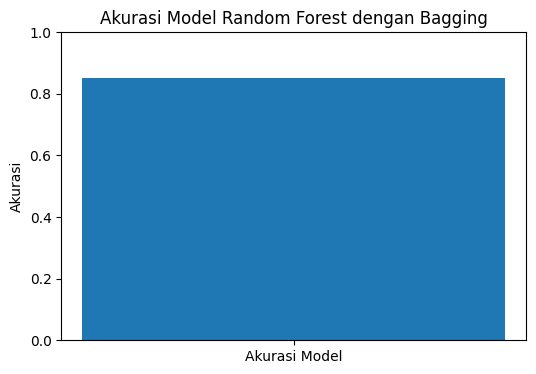

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Akurasi Model
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.bar(['Akurasi Model'], [accuracy])
plt.ylim(0, 1)
plt.title('Akurasi Model Random Forest dengan Bagging')
plt.ylabel('Akurasi')
plt.show()



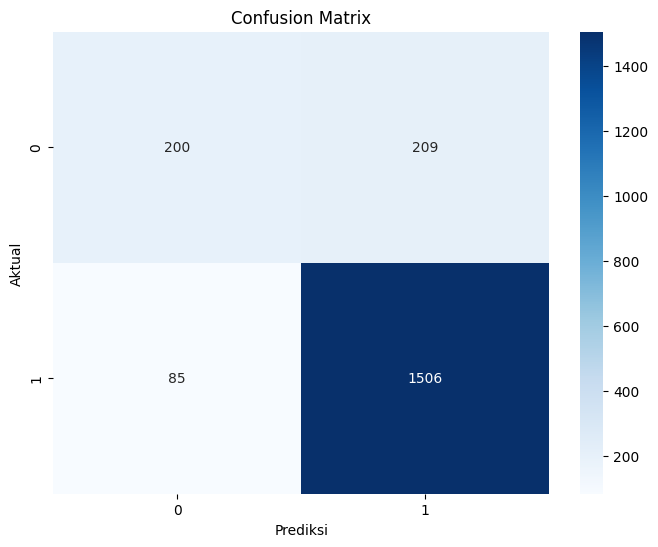

In [22]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()
